# Chapter 1: Making a Canvas



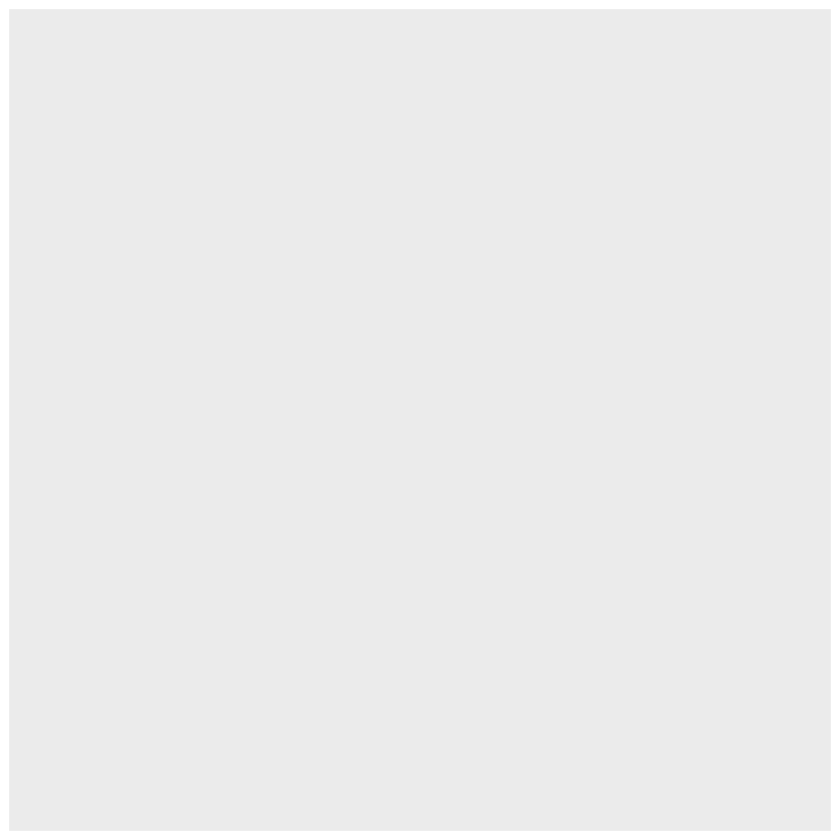

In [ ]:
library(ggplot2)
#Ketik function ggplot() di bawah ini
ggplot()


# Menambahkan Judul
Setiap orang akan sangat terbantu melihat suatu grafik apabila memiliki judul yang jelas. Ini dapat ditambahkan di ggplot dengan fungsi labs(title = "....").

Contoh perintah (syntax) dari labs adalah sebagai berikut:

```
[objek plot] + labs(title="Judul")
```



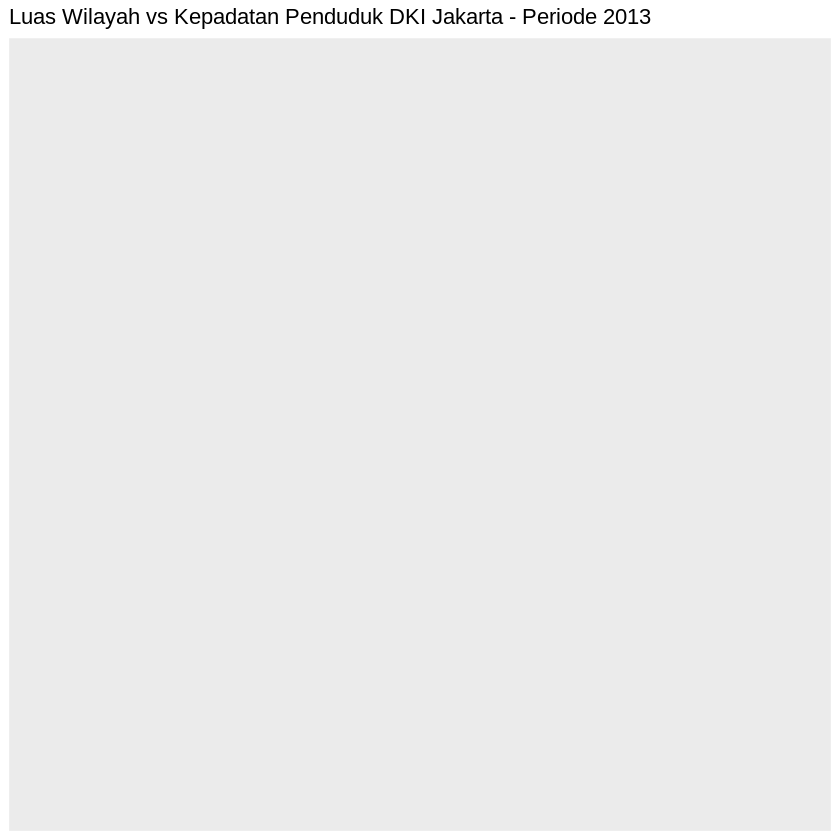

In [ ]:
library(ggplot2)

#Penambahan judul dengan menggunakan fungsi labs
ggplot() + labs(title="Luas Wilayah vs Kepadatan Penduduk DKI Jakarta - Periode 2013")


# Plot disimpan sebagai Variable
Komponen plot dan layer bisa disimpan saja dalam satu variable. Berikut adalah contoh perintah dimana kita memiliki satu variable bernama plot.jakarta yang menyimpan plot dan judul. Kemudian menampilkan grafik dengna hanya menuliskan nama variable tersebut.



```
library(ggplot2)
plot.jakarta <- ggplot()
plot.jakarta <- plot.jakarta + labs(title="Luas Wilayah vs Kepadatan Penduduk DKI Jakarta - Periode 2013")
plot.jakarta
```



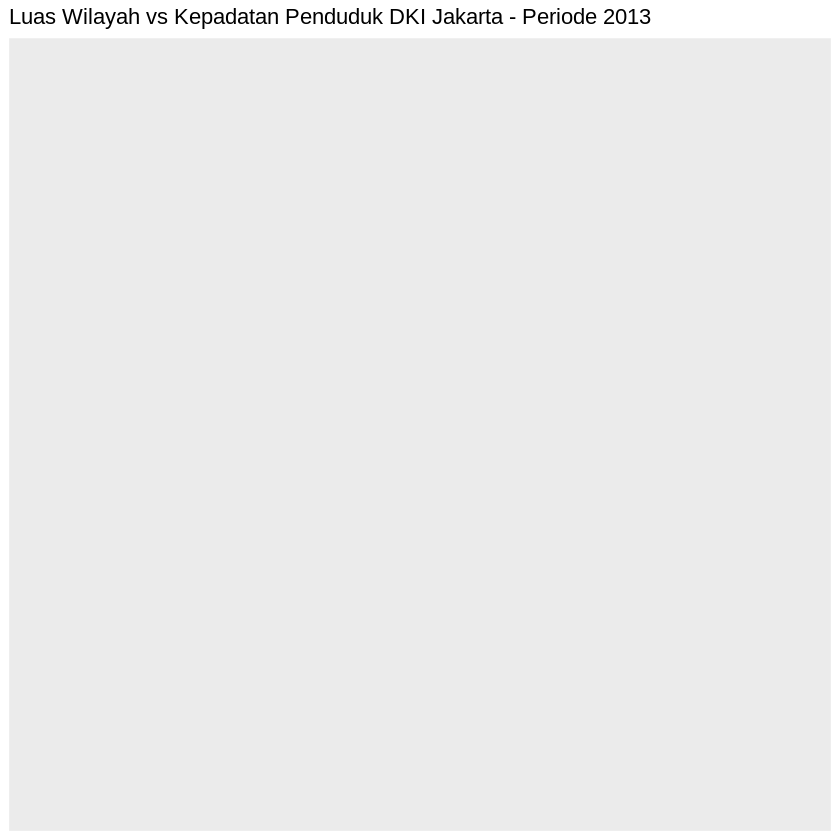

In [ ]:
library(ggplot2)
plot.jakarta <- ggplot()
plot.jakarta <- plot.jakarta + labs(title="Luas Wilayah vs Kepadatan Penduduk DKI Jakarta - Periode 2013")
plot.jakarta

# Menambahkan Label pada Sumbu X dan Y
Function labs yang sudah diperkenalkan pada tiga praktek sebelumnya bukan hanya bisa diisi dengan judul dan subjudul, tapi bisa juga untuk mengisi teks pada sumbu x dan y.

Berikut adalah konstruksi perintahnya:

```
[objek plot] + labs(x="Label X", y = "Label Y")
```


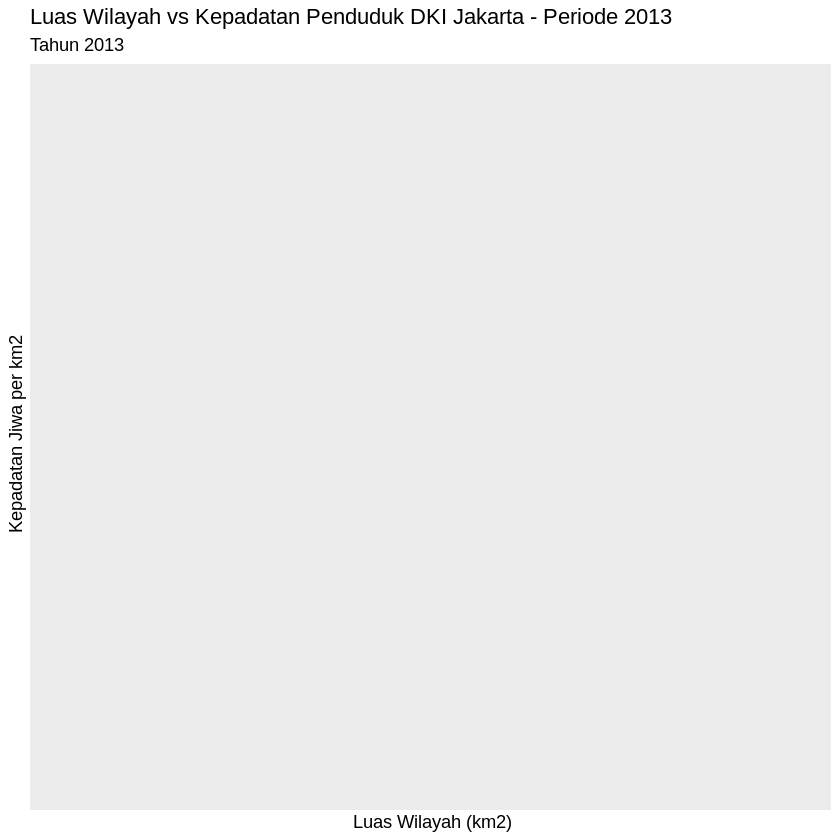

In [ ]:
library(ggplot2)
plot.jakarta <- ggplot()
plot.jakarta <- plot.jakarta + labs(title="Luas Wilayah vs Kepadatan Penduduk DKI Jakarta - Periode 2013", subtitle="Tahun 2013")
plot.jakarta <- plot.jakarta + labs(x=" Luas Wilayah (km2)",y=" Kepadatan Jiwa per km2")
plot.jakarta


# Fungsi summary untuk objek ggplot
Tidak setiap saat kita harus menganalisa plot dan komponennya dengan cara ditampilkan. Ketika sudah disimpan di variabel, kita bisa melihat detilnya dalam bentuk tekstual dengan menggunakan fungsi summary.

In [ ]:
library(ggplot2)
plot.jakarta <- ggplot()
plot.jakarta <- plot.jakarta + labs(title="Luas Wilayah vs Kepadatan Penduduk DKI Jakarta")
plot.jakarta <- plot.jakarta + labs(x = "Luas Wilayah (km2)", y="Kepadatan Jiwa per km2")
summary(plot.jakarta)


data: [x]
faceting: <ggproto object: Class FacetNull, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetNull, Facet, gg>


# Chapter 2: Data and Aesthetic Mapping



# Dataset Kepadatan Penduduk Jakarta
Dataset yang akan kita gunakan sepanjang praktek course ini adalah data wilayah dan kepadatan kependudukan Pemerintah Provinsi DKI Jakarta tahun 2013 yang diambil dari web Satu Data Indonesia.

Data kependudukan dipilih karena hampir seluruh organisasi, termasuk bisnis dan institusi pemerintah memerlukan ini untuk mengambil keputusan strategis. Sebagai contoh, dimana saya perlu membuka toko atau kantor cabang? Produk apa yang bakal laku di area tersebut?



Dataset ini telah diunduh dan ditempatkan di "https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv". Tindakan ini dilakukan karena jika ada pembaruan akan ada kemungkinan yang menyebakan perubahan kolom-kolom yang ada di dataset.

# Membaca Dataset Kependudukan dengan read.csv
Langkah pertama yang perlu kita lakukan adalah membaca dataset kependudukan tersebut dari file teks menjadi data.frame di R dengan perintah read.csv.

Mari kita praktekkan penggunaan read.csv ini dengan mengetikkan perintah berikut pada code editor.

```
# penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")
```



In [ ]:
library(ggplot2)
#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")
# Tampilkan data frame dari kolom " NAMA.KELURAHAN " dan "LUAS.WILAYAH..KM2."
penduduk.dki[c("NAMA.KELURAHAN","LUAS.WILAYAH..KM2.")]


NAMA.KELURAHAN,LUAS.WILAYAH..KM2.
<chr>,<dbl>
P. PANGGANG,0.91
P. KELAPA,3.76
P. HARAPAN,3.59
P. UNTUNG JAWA,0.59
P. TIDUNG,1.57
P. PARI,1.39
GAMBIR,2.58
CIDENG,1.26
PETOJO UTARA,1.12


# Memasukkan Data ke Plot
Data dapat dimasukkan ke dalam plot melalui argumen di function ggplot dengan syntax berikut :

```
# ggplot(data = …)
```
Untuk contoh data kependudukan kita, maka perintah lengkapnya adalah sebagai berikut :

```
# ggplot(data = penduduk.dki)
```




In [ ]:
library(ggplot2)
#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")
# Masukkan data ke dalam plot dan simpan sebagai variable plot.dki, dan tampilkan summary dari plot tersebut
plot.dki <- ggplot(data = penduduk.dki)
summary(plot.dki)

data: TAHUN, NAMA.PROVINSI, NAMA.KABUPATEN.KOTA, NAMA.KECAMATAN,
  NAMA.KELURAHAN, LUAS.WILAYAH..KM2., KEPADATAN..JIWA.KM2., X, X.1,
  X.2, X.3, X.4, X.5, X.6, X.7, X.8, X.9, X.10, X.11, X35.39.Laki.Laki,
  X35.39.Perempuan, X40.44.Laki.Laki, X40.44.Perempuan,
  X45.49.Laki.Laki, X45.49.Perempuan, X50.54.Laki.Laki,
  X50.54.Perempuan, X55.59.Laki.Laki, X55.59.Perempuan,
  X60.64.Laki.Laki, X60.64.Perempuan, X65.69.Laki.Laki,
  X65.69.Perempuan, X70.74.Laki.Laki, X70.74.Perempuan, X.75.Laki.Laki,
  X.75..Perempuan [267x37]
faceting: <ggproto object: Class FacetNull, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetNull, Facet, gg>


# Memetakan x, y dan color dengan function aes
Setelah data dimasukkan pada plot, saatnya kita memetakan kolom yang diperlukan pada data tersebut ke elemen visual. Pemetaan ini disebut dengan aesthetic mapping.

Untuk melakukan hal ini, kita gunakan function aes yang memiliki syntax berikut :

```
# aes([nama_elemen_1] = [nama_kolom_atau_nilai_ 1], [nama_elemen_2] = [nama_kolom_atau_nilai_ 2] …)
```



In [ ]:
library(ggplot2)
#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")
aes(x = LUAS.WILAYAH..KM2., y=KEPADATAN..JIWA.KM2.,  color=NAMA.KABUPATEN.KOTA)
summary(plot.dki)


Aesthetic mapping: 
* `x`      -> `LUAS.WILAYAH..KM2.`
* `y`      -> `KEPADATAN..JIWA.KM2.`
* `colour` -> `NAMA.KABUPATEN.KOTA`

data: TAHUN, NAMA.PROVINSI, NAMA.KABUPATEN.KOTA, NAMA.KECAMATAN,
  NAMA.KELURAHAN, LUAS.WILAYAH..KM2., KEPADATAN..JIWA.KM2., X, X.1,
  X.2, X.3, X.4, X.5, X.6, X.7, X.8, X.9, X.10, X.11, X35.39.Laki.Laki,
  X35.39.Perempuan, X40.44.Laki.Laki, X40.44.Perempuan,
  X45.49.Laki.Laki, X45.49.Perempuan, X50.54.Laki.Laki,
  X50.54.Perempuan, X55.59.Laki.Laki, X55.59.Perempuan,
  X60.64.Laki.Laki, X60.64.Perempuan, X65.69.Laki.Laki,
  X65.69.Perempuan, X70.74.Laki.Laki, X70.74.Perempuan, X.75.Laki.Laki,
  X.75..Perempuan [267x37]
faceting: <ggproto object: Class FacetNull, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetNull, Facet, gg>


# Menampilkan Plot hasil Mapping

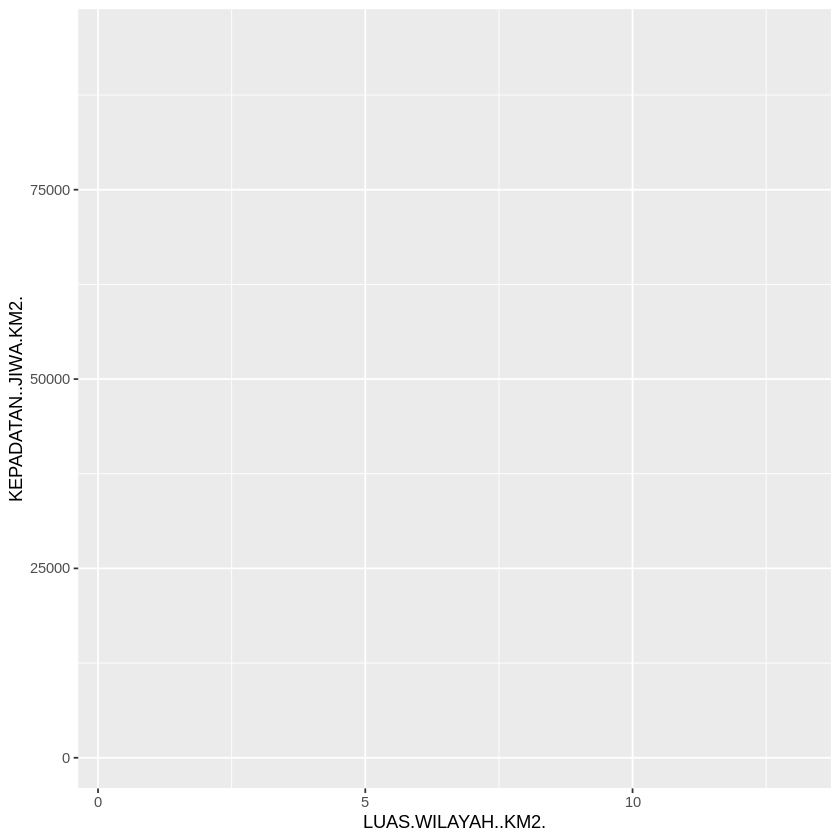

In [ ]:
library(ggplot2)
#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")
plot.dki <- ggplot(data=penduduk.dki, aes(x = LUAS.WILAYAH..KM2.,  y=KEPADATAN..JIWA.KM2.,  color=NAMA.KABUPATEN.KOTA))
plot.dki


# Chapter 3: Scatter Plot



Mengulang kembali sedikit konsep yang telah dipaparkan di bab awal, grafik bisa dihasilkan dengan menambahkan layer secara berlapis di atas plot.

Setiap layer terdiri dari objek-objek berikut:

* Geom: Bentuk geometri seperti garis (line), batang (bar), titik (point), dan lain-lain.

* Stat: Atau suatu fungsi untuk melakukan transformasi statistik terhadap data input.

* Contoh paling sederhana adalah transformasi data untuk kepadatan jiwa dari angka menjadi range atau inverval per lima ribuan. Jadi data input dengan angka 8041 diubah menjadi interval angka 8001-8500. Transformasi ini disebut dengan bin. Jika kita tidak ingin mengubah apa-apa, stat yang kita gunakan adalah identity.

* Position: Posisi dari beberapa data yang memiliki nilai yang sama. Jika diplot sebagai scatter plot misalnya, tentunya data-data tersebut akan menumpuk di satu titik. Apakah perlu ditambahkan nilai acak tertentu sehingga pas digambarkan, terlihat datanya lebih tersebar? Jika iya, maka ini namanya jitter. Jika kita tidak ingin merubah posisi, maka kita gunakan **identity.**
Berikut adalah diagram summary untuk proses menampilkan grafik dengan objek **plot dan layer.**

![Scatter Plot](https://drive.google.com/uc?export=view&id=18gv2yrBKH5CILKWaJtjp4at3xmdY3kWu)

# Scatter Plot Kepadatan Penduduk Jakarta dengan function layer
Untuk menggambar grafik sebenarnya pada ggplot, kita menambahkan apa yang dinamakan layer. Layer bisa dihasilkan dengan menggunakan function layer dengan syntax berikut:

```
# layer(geom = "…", stat = "…", position = "…")
```



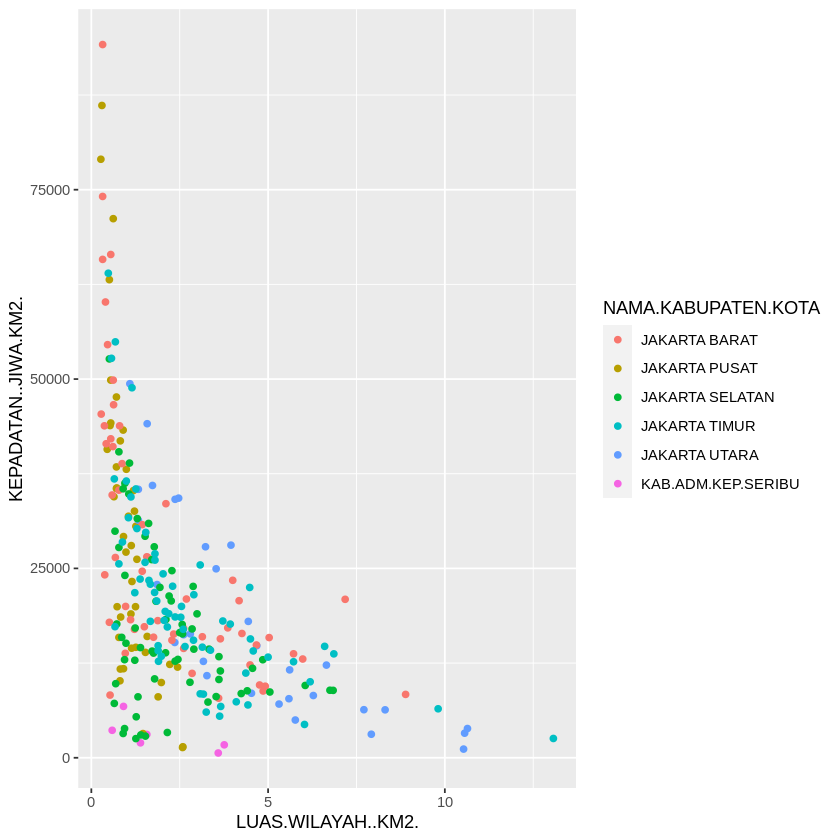

In [ ]:
library(ggplot2)
#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")

#Menambahkan data dan aesthetic mapping
plot.dki <- ggplot(data=penduduk.dki, aes(x = LUAS.WILAYAH..KM2.,  y=KEPADATAN..JIWA.KM2.,  color=NAMA.KABUPATEN.KOTA))

#Menambahkan layer untuk menghasilkan grafik scatter plot
plot.dki + layer(geom = "point", stat = "identity", position = "identity")


# Scatter Plot Kepadatan Penduduk Jakarta dengan geom_point
Perintah layer untuk menggambar scatter plot pada subbab sebelumnya, memiliki shortcut function yang lebih pendek. Function tersebut bernama geom_point.

Dengan demikian, fungsi layer yang sebelumnya harus diketik sebagai berikut :

```
# layer(geom = "point", stat = "identity", position = "identity")
```
dapat diubah menjadi:

```
# geom_point()
```
**Catatan:** Stat dan position tidak perlu diisi, karena fungsi geom_point ini secara otomatis akan memiliki nilai "identity" untuk stat dan position. Berbeda ketika menggunakan layer, dimana parameter stat dan position harus diisi lengkap.

Ketik geom_point() untuk menggantikan bagian […] Jika berjalan dengan baik, grafik yang sama dengan praktek sebelumnya akan dihasilkan sebagai berikut.




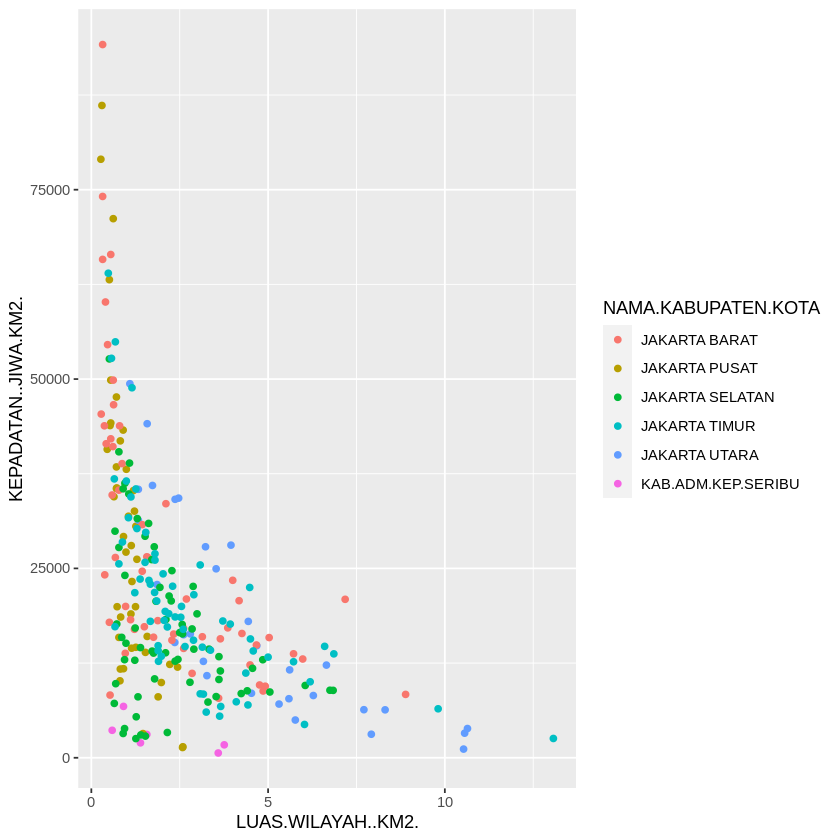

In [ ]:
library(ggplot2)
#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")

#Menambahkan data dan aesthetic mapping
plot.dki <- ggplot(data=penduduk.dki, aes(x = LUAS.WILAYAH..KM2.,  y=KEPADATAN..JIWA.KM2.,  color=NAMA.KABUPATEN.KOTA))

#Menambahkan layer scatter plot dengan geom_point
plot.dki + geom_point()


# Menambahkan Judul dan Label

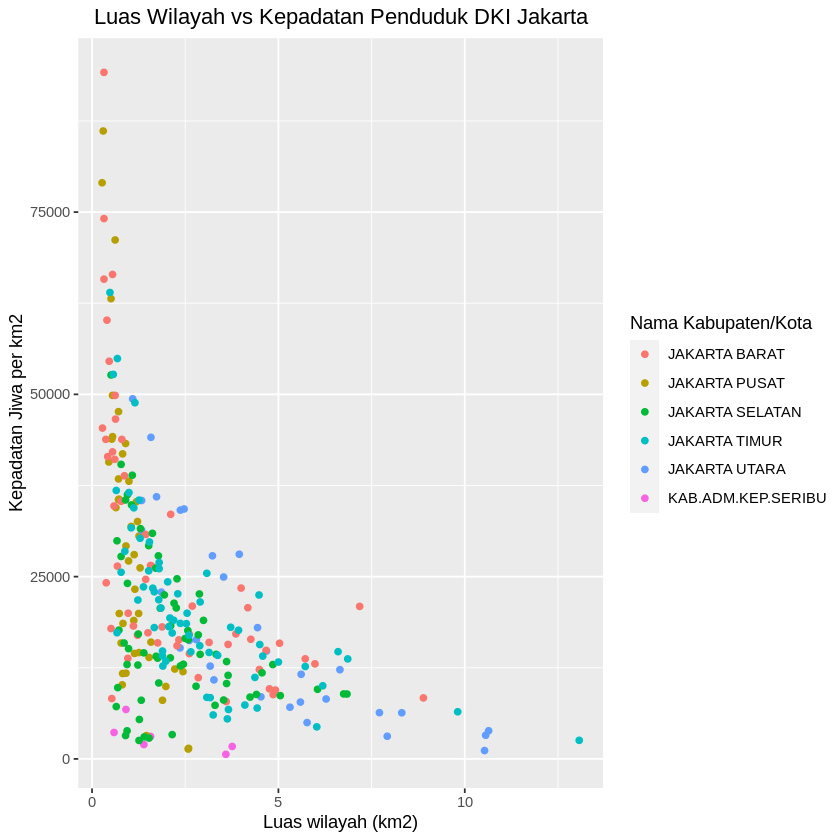

In [ ]:
library(ggplot2)

#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")

#Menambahkan data dan aesthetic mapping
plot.dki <- ggplot(data=penduduk.dki, aes(x = LUAS.WILAYAH..KM2.,  y=KEPADATAN..JIWA.KM2.,  color=NAMA.KABUPATEN.KOTA))

#Menambahkan Layer dan labels
plot.dki + geom_point() +
  theme(plot.title = element_text(hjust=0.5)) +
  labs(title= "Luas Wilayah vs Kepadatan Penduduk DKI Jakarta",x="Luas wilayah (km2)",y = "Kepadatan Jiwa per km2",color = "Nama Kabupaten/Kota")


# Chapter 4: Histogram



Layer geom_histogram dan Lebar Interval
Untuk menghasilkan histogram maka kita gunakan function geom_histogram untuk ditambahkan ke plot.

Layer histogram ini memerlukan stat bertipe bin, yaitu membagi data menjadi interval. Namun dengan penggunaan geom_histogram, stat ini sudah menjadi bin secara default jadi tidak perlu lagi dispesifikasikan.

Secara default geom histogram tidak memerlukan aesthetic mapping untuk sumbu y, cukup menggunakan sumbu x.

Namun ada parameter yang perlu diinput, yaitu besarnya interval bin. Ini menggunakan parameter binwidth.

Contoh untuk membuat layer geom_histogram adalah sebagai berikut :

```
# [objek plot] + geom_histogram(binwidth=5000)
```

Berikut adalah penjelasan lengkap elemen-elemen perintah di atas.

Komponen:

* Objek plot: Objek plot dari hasil function ggplot() ditambah dengan komponen visual atau layer

* Tanda plus: operator untuk menambahkan komponen lain ke dalam plot

* geom_histogram: Function untuk menghasilkan layer dengan geom histogram

* binwidth:	Lebar interval data, dalam hal ini 5000

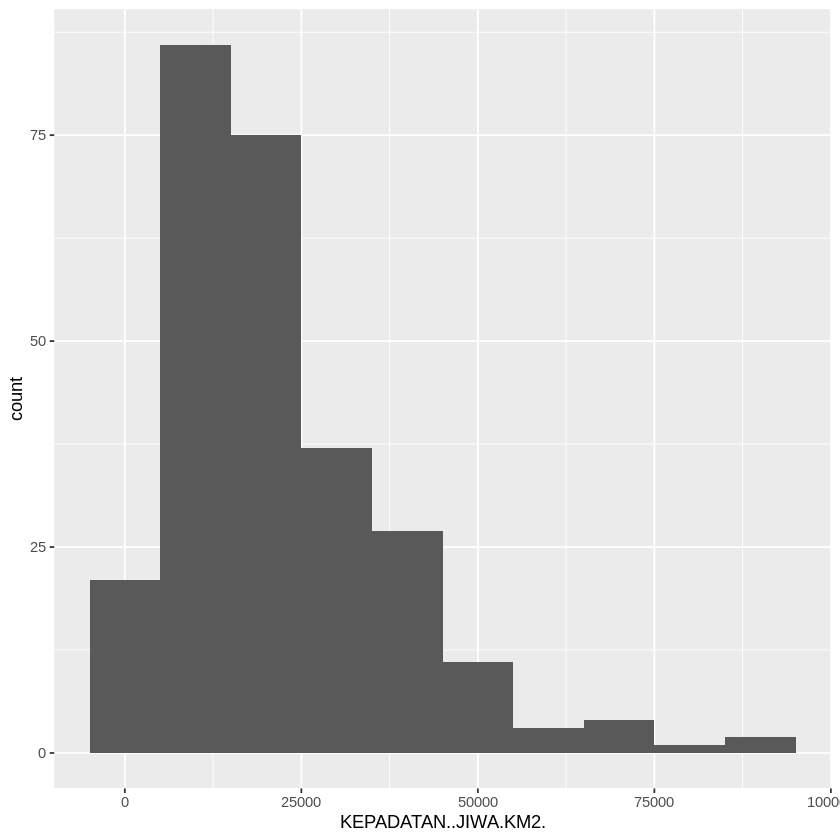

In [ ]:
library(ggplot2)

#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")

#Menambahkan data dan aesthetic mapping
plot.dki <- ggplot(data=penduduk.dki, aes(x = KEPADATAN..JIWA.KM2.))
plot.dki + geom_histogram(binwidth=10000)


# Penggunaaan aesthetic fill
Kita dapat melakukan banyak penambahan informasi pada histogram sebelumnya.

Untuk ini kita menggunakan aesthetic fill dengan syntax berikut :

```
# aes(fill = NAMA.KABUPATEN.KOTA)
```



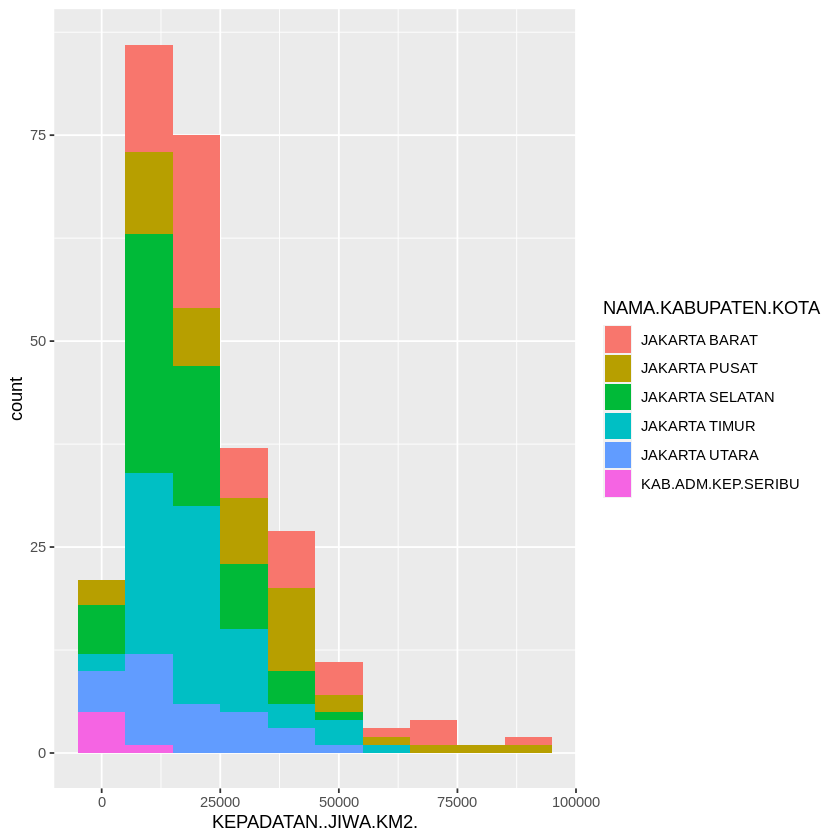

In [ ]:
library(ggplot2)

#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")

plot.dki <- ggplot(data=penduduk.dki, aes(x = KEPADATAN..JIWA.KM2., fill=NAMA.KABUPATEN.KOTA))

plot.dki + geom_histogram(binwidth = 10000)


# Chapter 5: Line Chart



**Line chart** atau grafik garis adalah tipe visualisasi yang sangat baik untuk menggambarkan apa impact (pengaruh) dari perubahan suatu variabel dari satu titik ke titik lain atau trend– dan variabel yang paling umum digunakan adalah waktu.

Sebagai contoh, di bidang ekonomi untuk menggambarkan inflasi dari bulan ke bulan. Namun tentunya tidak harus selalu waktu. Perubahan lain, misalkan pengaruh kecepatan lari dengan peningkatan detak jantung.

Untuk membuat line chart standar, kita gunakan geom bertipe "line" dan stat "identity", yang bisa diwakili oleh **function geom_line.**

Pada bab berikut kita akan gunakan dataset tambahan, yaitu tingkat inflasi bulanan tahun 2017 untuk negara Indonesia dan Singapura. Selain plotting, diperkenalkan juga konsep factoring untuk menangani data dan grouping untuk grafik.


https://storage.googleapis.com/dqlab-dataset/inflasi.csv

Dataset ini hanya memiliki tiga kolom, yaitu:

1.   Bulan: bulan dan tahun data inflasi.
2.   Negara: negara yang mengalami inflasi.
3.  Inflasi: tingkat inflasi dalam persentase.

File ini berbentuk csv dan akan dibaca dengan menggunakan function read.csv.

# Membaca data inflasi

In [ ]:
#Membaca data csv dan dimasukkan ke variable inflasi.indo.sing
inflasi.indo.sing <- read.csv("https://storage.googleapis.com/dqlab-dataset/inflasi.csv", sep=",")
inflasi.indo.sing


Bulan,Negara,Inflasi
<chr>,<chr>,<dbl>
Jan-2017,Indonesia,0.0349
Feb-2017,Indonesia,0.0383
Mar-2017,Indonesia,0.0361
Apr-2017,Indonesia,0.0417
May-2017,Indonesia,0.0433
Jun-2017,Indonesia,0.0437
Jul-2017,Indonesia,0.0388
Aug-2017,Indonesia,0.0382
Sep-2017,Indonesia,0.0372


# Plotting Line Chart yang Kosong
Untuk membuat **line chart** dari data inflasi, kita lakukan langkah-langkah dari **ggplot2:**

> * Membuat plot, dengan function ggplot()
> * Mengisi data dari pembacaan file dengan function read.csv()
> * Membuat aesthetic mapping, dengan function aes
> * Menambahkan layer, dengan function geom_line()

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


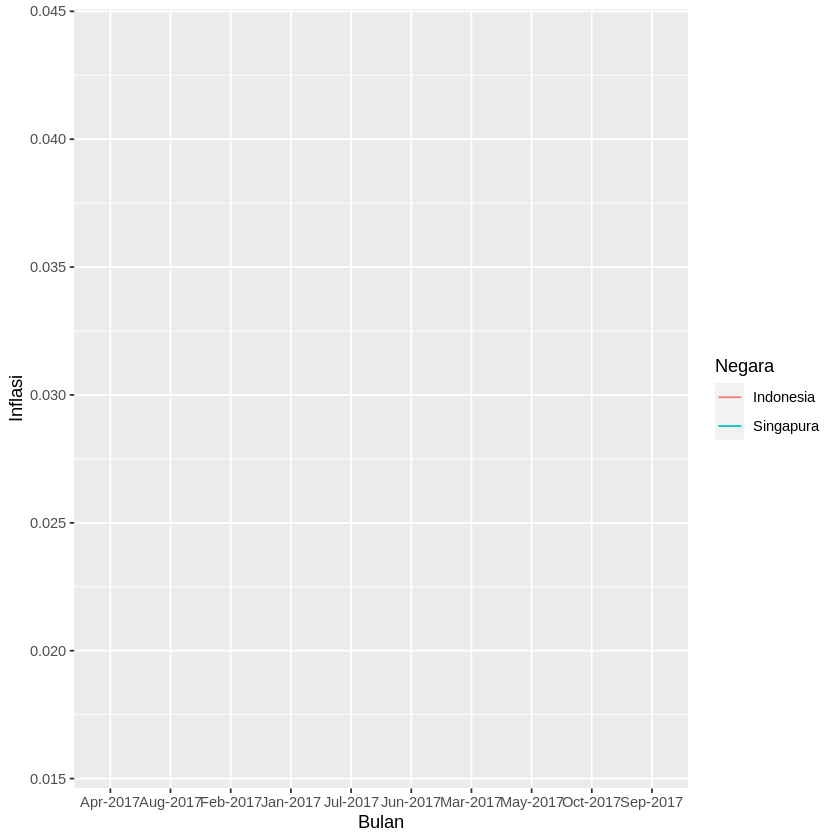

In [ ]:
library(ggplot2)

#Membaca data csv dan dimasukkan ke variable inflasi.indo.sing
inflasi.indo.sing <- read.csv("https://storage.googleapis.com/dqlab-dataset/inflasi.csv", sep=",")

#Menambahkan data dan aesthetic mapping
plot.inflasi <- ggplot(data=inflasi.indo.sing, aes(x = Bulan,  y=Inflasi,  color=Negara))

#Menambahkan layer
plot.inflasi + geom_line()


# Menggunakan Pengelompokan Data (grouping)

Walaupun pada gambar kita sudah memiliki aesthetic color yang membagi Indonesia dan Singapura, tapi kita masih perlu memiliki aesthetic group sebagai berikut:

```
# aes(…, group=Negara)
```



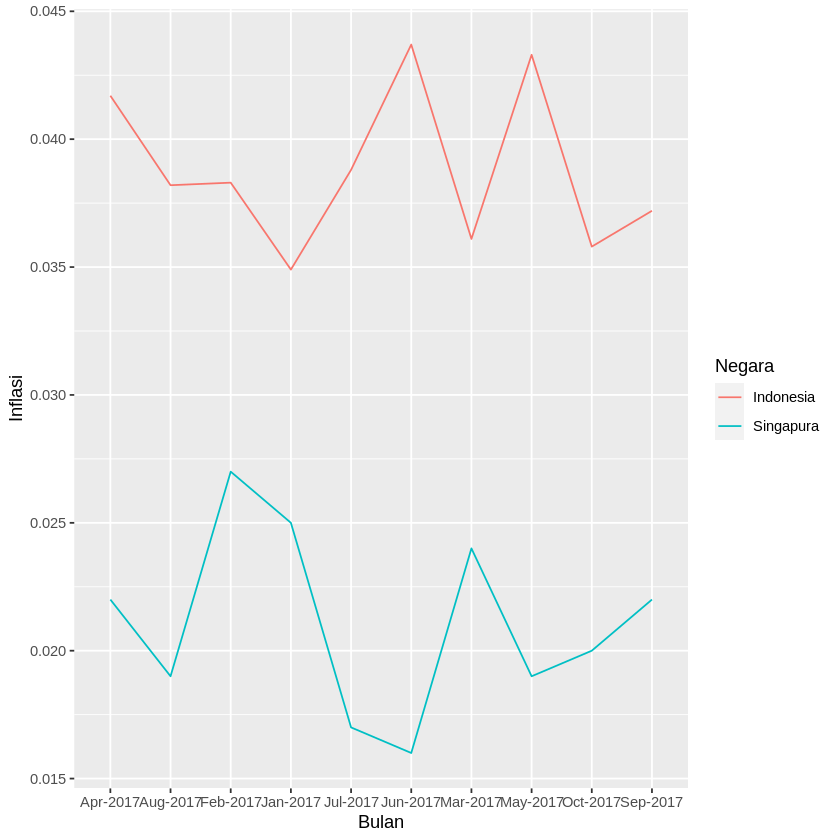

In [ ]:
library(ggplot2)

#Membaca data csv dan dimasukkan ke variable inflasi.indo.sing
inflasi.indo.sing <- read.csv("https://storage.googleapis.com/dqlab-dataset/inflasi.csv", sep=",")

#Menambahkan data dan aesthetic mapping
plot.inflasi <- ggplot(data=inflasi.indo.sing, aes(x = Bulan,  y=Inflasi,  color=Negara, group=Negara))

#Menambahkan Layer
plot.inflasi + geom_line()

# Memperbaiki Urutan Bulan dengan Factoring

Urutan bulan yang salah pada praktek sebelumnya karena masalah pengurutan internal di sistem R, yang mengurutkan berdasarkan alphabet.

Jika kita lihat internal struktur dengan function str, maka untuk kolom bulan terlihat sebagai berikut.

Kita dapat secara manual merubah urutan ini dengan factor dan parameter levels dimasukkan manual.

Dengan data bulan dari Jan s/d Oct 2017 maka konstruksi factor adalah sebagai berikut.

```
# factor(inflasi.indo.sing$Bulan, levels = c("Jan-2017", "Feb-2017", "Mar-2017", "Apr-2017", "May-2017", "Jun-2017", "Jul-2017", "Aug-2017", "Sep-2017", "Oct-2017"))
```

Ini perlu dimasukkan kembali ke kolom bulan untuk merubah urutannya dengan perintah berikut.

```
# inflasi.indo.sing$Bulan <- factor(inflasi.indo.sing$Bulan, levels = c("Jan-2017", "Feb-2017", "Mar-2017", "Apr-2017", "May-2017", "Jun-2017", "Jul-2017", "Aug-2017", "Sep-2017", "Oct-2017"))
```




# Plotting Ulang dengan hasil Factoring

In [ ]:
library(ggplot2)
#Membaca data csv dan dimasukkan ke variable inflasi.indo.sing
inflasi.indo.sing <- read.csv("https://storage.googleapis.com/dqlab-dataset/inflasi.csv", sep=",")
inflasi.indo.sing$Bulan <- factor(inflasi.indo.sing$Bulan, levels = c("Jan-2017", "Feb-2017", "Mar-2017", "Apr-2017", "May-2017", "Jun-2017", "Jul-2017", "Aug-2017", "Sep-2017", "Oct-2017"))

str(inflasi.indo.sing)

'data.frame':	20 obs. of  3 variables:
 $ Bulan  : Factor w/ 10 levels "Jan-2017","Feb-2017",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Negara : chr  "Indonesia" "Indonesia" "Indonesia" "Indonesia" ...
 $ Inflasi: num  0.0349 0.0383 0.0361 0.0417 0.0433 0.0437 0.0388 0.0382 0.0372 0.0358 ...


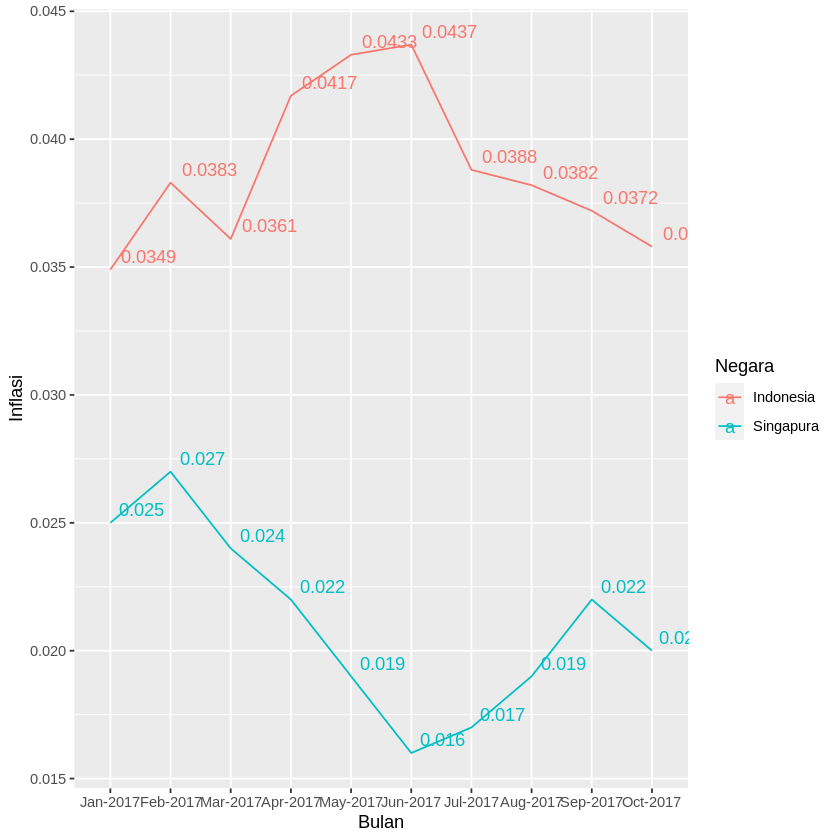

In [ ]:
library(ggplot2)

#Membaca data csv dan dimasukkan ke variable inflasi.indo.sing
inflasi.indo.sing <- read.csv("https://storage.googleapis.com/dqlab-dataset/inflasi.csv", sep=",")

inflasi.indo.sing$Bulan = factor(inflasi.indo.sing$Bulan,
                                 levels = c("Jan-2017", "Feb-2017", "Mar-2017", "Apr-2017", "May-2017", "Jun-2017", "Jul-2017", "Aug-2017", "Sep-2017", "Oct-2017"))

#Menambahkan data dan aesthetic mapping
plot.inflasi <- ggplot(data=inflasi.indo.sing, aes(x = Bulan,  y=Inflasi,  color=Negara, group=Negara))


#Menambahkan Layer dan labels
plot.inflasi + geom_line() + geom_text(aes(label=Inflasi),hjust=-0.2, vjust=-0.5)


# Chapter 6: Bar Chart and Line Chart



Dataset Kependudukan Jakarta versi DQLab
Pada dataset asli kependudukan Jakarta, terdapat kolom-kolom jumlah penduduk per kabupaten yang tersebar ke banyak kolom dengan pembagian umur dan jenis kelamin di nama kolom, seperti terlihat pada gambar berikut.

![Raw Data Jakarta](https://drive.google.com/uc?export=view&id=1aCnTbbf72iU0aX2kmWxbRdAQUBD3dwdT)


Kolom-kolom ini akan butuh banyak data treatment atau data preparation sebelum dapat digunakan untuk kepentingan penggunaan grafik kita untuk bab ini.

Oleh sebab itu, DQLab telah melakukan proses tersebut sehingga datanya menjadi seperti bentuk berikut.



Catatan: Detail transformasi data yang dilakukan akan dibahas di course "Data Preparation / Wrangling with R"

Berikut adalah nama kolom dataset tersebut.

1.   TAHUN: Tahun
2.   NAMA PROVINSI: Nama provinsi di DKI Jakarta, dan nilainya hanya ada satu
3.   NAMA KABUPATEN/KOTA: Nama kabupaten/kota di DKI Jakarta
4.   NAMA KECAMATAN: Nama kecamatan di DKI Jakarta
5.   NAMA KELURAHAN: Nama kelurahan di DKI Jakarta
6.   LUAS WILAYAH (KM2): Luas wilayah (km persegi)
7.   KEPADATAN (JIWA/KM2): Kepadatan penduduk (jiwa/km2)
8.   JENIS KELAMIN: Jenis kelamin dari populasi
9.   RENTANG UMUR: Rentang umur dari populasi
10.  JUMLAH: Jumlah penduduk

Dengan demikian, dataset ini telah kita ubah strukturnya tanpa menghilangkan informasi aslinya. File csv dari dataset ini dapat didownload di url berikut:

https://storage.googleapis.com/dqlab-dataset/datakependudukandki-dqlab.csv

**Menghasilkan Bar Chart Pertama**
Untuk menghasilkan bar chart kita bisa gunakan function geom_bar. Function ini akan menghasilkan sebuah layer untuk kita tambahkan ke plot.

Secara default, stat yang digunakan oleh geom_bar adalah count sehingga bar chart hanya akan menghitung jumlah baris data point per x, dan tidak membutuhkan aesthetic mapping y.

Berikut adalah contoh perintah dimana kita menghasilkan bar chart dengan dataset kependudukan DKI Jakarta.

```
# plot.dki <- ggplot(data=penduduk.dki, aes(x = JENIS.KELAMIN))
plot.dki + geom_bar()
```



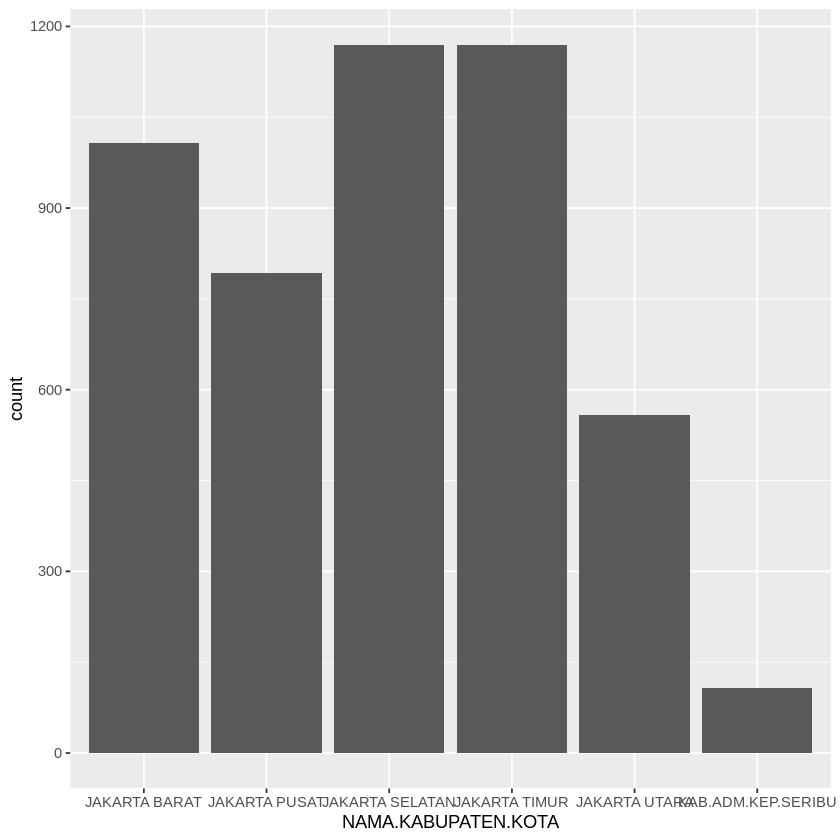

In [ ]:
library(ggplot2)
#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/datakependudukandki-dqlab.csv", sep=",")
plot.dki <- ggplot(data=penduduk.dki, aes(x = NAMA.KABUPATEN.KOTA))
plot.dki + geom_bar()

# Aesthetic Y dan Stat Identity
Pada praktek sebelumnya, bar chart kita masih mirip dengan histogram. Dan itu bukan yang kita inginkan.

Kita akan memplot bar chart, dimana aesthetic y menggunakan stat penjumlahan (sum) - bukan count - dari data kepadatan penduduk.

Ini bisa dilakukan dengan mengisi dua hal berikut:

> * Mengisi aesthetic y dengan kolom grouping yang kita inginkan - yaitu kolom bernama JUMLAH - pada plot (ggplot).

> * ```# y = JUMLAH```

> * Mengisi parameter stat dengan nilai identity pada bagian layer (geom_bar).

> * ```# stat = "identity"```




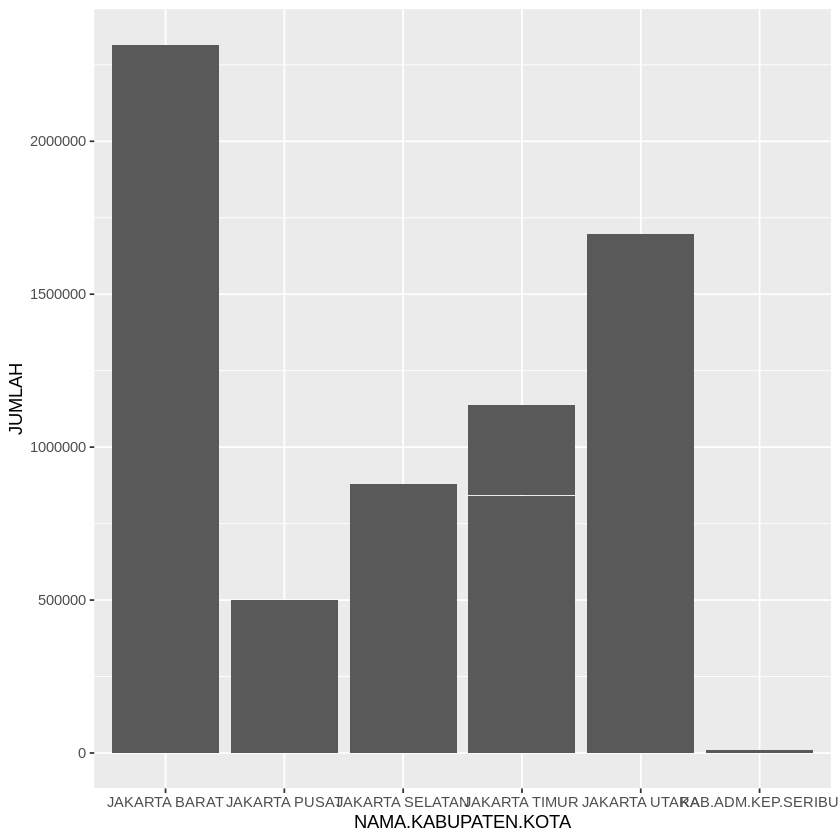

In [ ]:
library(ggplot2)

#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/datakependudukandki-dqlab.csv", sep=",")

#Menghasilkan bar chart

#Membuat plot
plot.dki <- ggplot(data=penduduk.dki, aes(x = NAMA.KABUPATEN.KOTA, y = JUMLAH))

#Menambahkan layer pada plot
plot.dki + geom_bar(stat = "identity")


# Aesthetic Fill dan Position Dodge

Untuk melakukan hal ini, ada dua hal yang mesti kita lakukan:

> * Aesthetic fill pada objek plot perlu diberikan input kolom **JENIS.KELAMIN.**

> * ```# fill = JENIS.KELAMIN```

> * Agar data antara Laki-laki dan Perempuan tidak menjadi satu bar, position pada layer kita isi dengan nilai dodge – dimana objek satu dengan objek yang lain diposisikan bersisian.

> * ```# position = "dodge""```

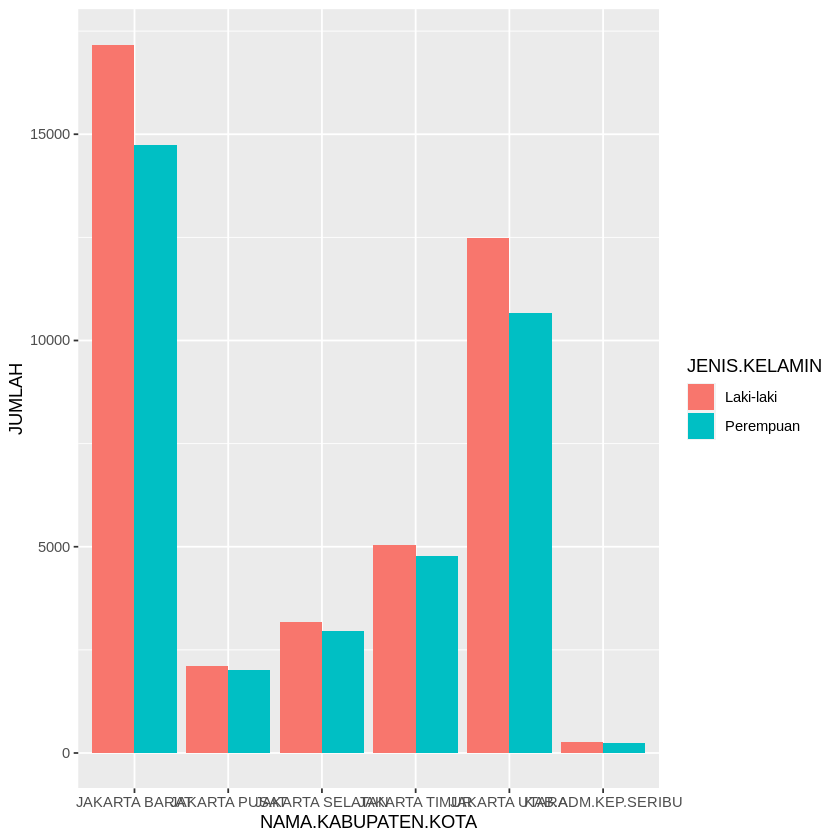

In [ ]:
library(ggplot2)

#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/datakependudukandki-dqlab.csv", sep=",")

#Bagian plot
plot.dki <- ggplot(data=penduduk.dki, aes(x = NAMA.KABUPATEN.KOTA, y=JUMLAH, fill=JENIS.KELAMIN))

#Bagian penambahan layer
plot.dki + geom_bar(stat="identity", position ="dodge")


# Fungsi Aggregate

Data frame yang kita gunakan pada plot, sering sekali harus dilakukan summary terlebih sehingga dapat diproses lebih mudah oleh layer di ggplot.

Fungsi summary yang bisa kita gunakan adalah function aggregate, yang memiliki minimal tiga input sebagai berikut:

* x: merupakan list dari kolom data yang ingin kita jadikan summary

* FUN: function summary yang bisa kita gunakan, misalkan sum, mean, dan lain-lain

* by: list berisi pasangan daftar field yang ingin kita gunakan
Untuk lebih jelasnya, kita langsung gunakan contoh sebagai berikut:

Untuk lebih jelasnya, kita langsung gunakan contoh sebagai berikut:


```
# aggregate(x=list(RATARATA=penduduk.dki$JUMLAH), FUN=mean, by = list(NAMA.KABUPATEN.KOTA=penduduk.dki$NAMA.KABUPATEN.KOTA, JENIS.KELAMIN=penduduk.dki$JENIS.KELAMIN))
```



In [ ]:
library(ggplot2)

#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/datakependudukandki-dqlab.csv", sep=",")
#Melakukan agregasi
aggregate(x=list(JUMLAH=penduduk.dki$JUMLAH), FUN=sum, by = list(NAMA.KABUPATEN.KOTA=penduduk.dki$NAMA.KABUPATEN.KOTA, JENIS.KELAMIN=penduduk.dki$JENIS.KELAMIN))


NAMA.KABUPATEN.KOTA,JENIS.KELAMIN,JUMLAH
<chr>,<chr>,<int>
JAKARTA BARAT,Laki-laki,1177351
JAKARTA PUSAT,Laki-laki,270490
JAKARTA SELATAN,Laki-laki,445152
JAKARTA TIMUR,Laki-laki,578471
JAKARTA UTARA,Laki-laki,861274
KAB.ADM.KEP.SERIBU,Laki-laki,4258
JAKARTA BARAT,Perempuan,1138830
JAKARTA PUSAT,Perempuan,229566
JAKARTA SELATAN,Perempuan,432985


# "Merapikan" Tampilan Bar Chart

Warning message:
“`position_dodge()` requires non-overlapping x intervals”


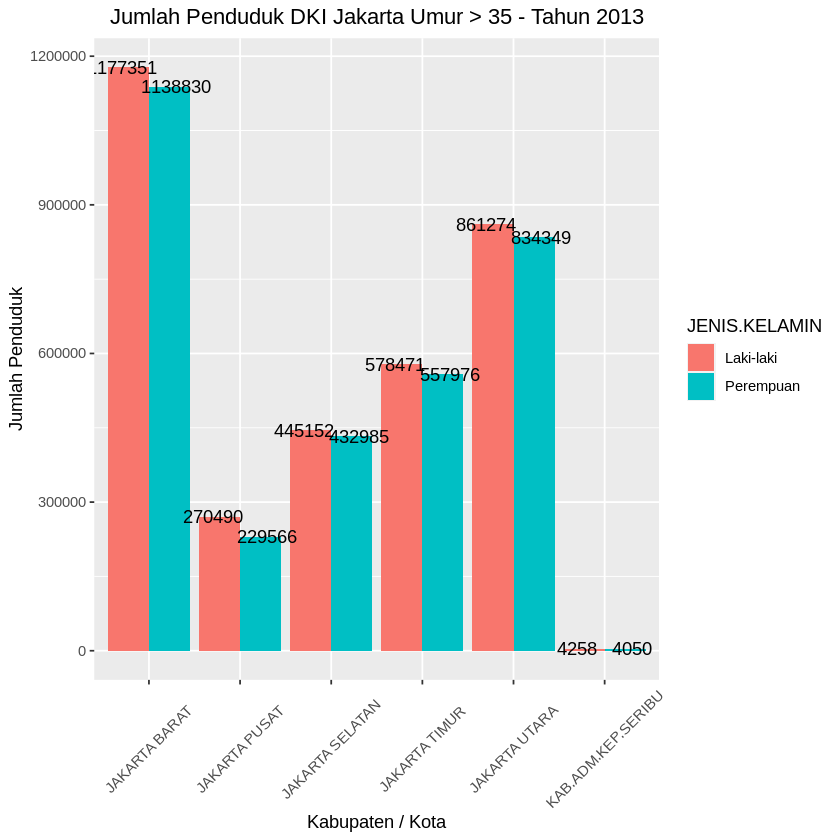

In [ ]:
library(ggplot2)
#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/datakependudukandki-dqlab.csv", sep=",")
#Melakukan agregasi
p <- aggregate(x=list(JUMLAH=penduduk.dki$JUMLAH), FUN=sum, by = list(NAMA.KABUPATEN.KOTA=penduduk.dki$NAMA.KABUPATEN.KOTA, JENIS.KELAMIN=penduduk.dki$JENIS.KELAMIN))

#Plot grafik
plot.dki <- ggplot(data=p, aes(x = NAMA.KABUPATEN.KOTA, y=JUMLAH, fill=JENIS.KELAMIN, label = JUMLAH))
plot.dki <- plot.dki + geom_bar(stat="identity", position="dodge")
plot.dki <- plot.dki + labs(title="Jumlah Penduduk DKI Jakarta Umur > 35 - Tahun 2013", x="Kabupaten / Kota", y="Jumlah Penduduk")
plot.dki <- plot.dki + theme(axis.text.x = element_text(angle=45,vjust = 0.5), plot.title = element_text(hjust=0.5))
plot.dki <- plot.dki + geom_text(position = position_dodge(1.2))
plot.dki


# Pie Chart dengan Koordinat Polar
Pie chart adalah jenis grafik yang banyak digunakan secara umum untuk menampilkan rasio. Dan uniknya, di ggplot2 tidak ada fungsi khusus yang menghasilkan pie chart ini.

Pie chart dihasilkan dengan proses yang cukup unik, dimana koordinat dari geom bar diubah ke polar.

Untuk lebih jelasnya, kita gunakan contoh langkah demi langkah.

Jika kita memilik plot data kependudukan di variable p, dan kita ingin membentuk suatu grafik geom bar yang tidak ada pemetaan x-nya, tapi sumbu y diisi dengan JUMLAH, dan pengisian warna menggunakan NAMA.KABUPATEN.KOTA maka perintahnya adalah sebagai berikut.

```
# plot.dki <- ggplot(data=p, aes(x="", y=JUMLAH, fill = NAMA.KABUPATEN.KOTA))
plot.dki + geom_bar(width = 1, stat = "identity")
```



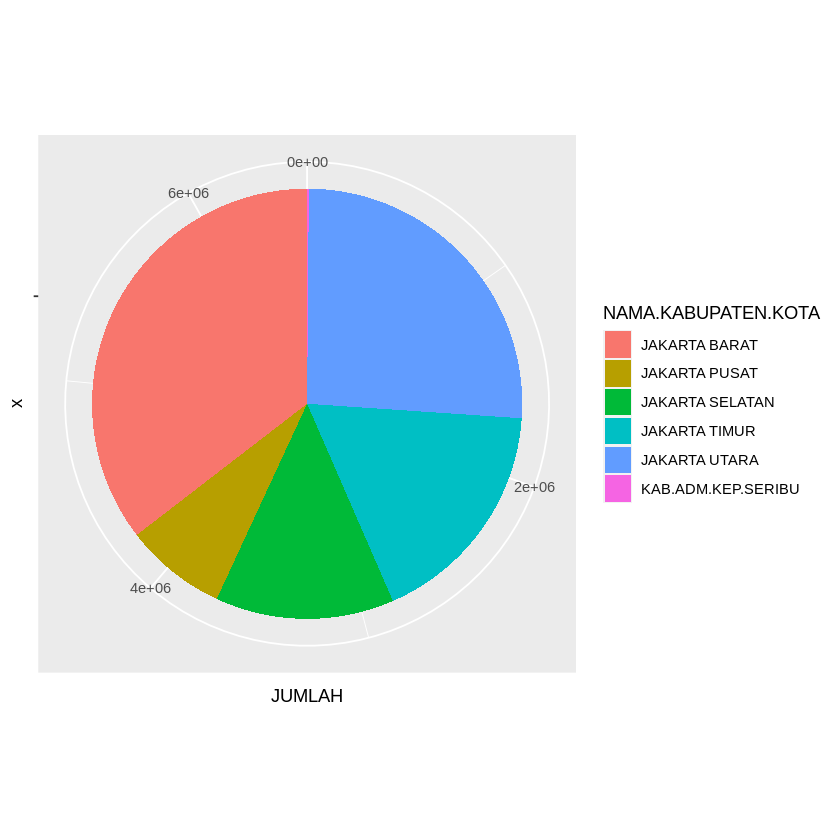

In [ ]:
library(ggplot2)

#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/datakependudukandki-dqlab.csv", sep=",")
#Melakukan agregasi
p <- aggregate(x=list(JUMLAH=penduduk.dki$JUMLAH), FUN=sum, by = list(NAMA.KABUPATEN.KOTA=penduduk.dki$NAMA.KABUPATEN.KOTA))
#Plot grafik pie chart
plot.dki <- ggplot(data=p, aes(x="", y=JUMLAH, fill = NAMA.KABUPATEN.KOTA))

plot.dki <- plot.dki + geom_bar(width = 1, stat = "identity")
plot.dki <- plot.dki + coord_polar("y", start=0)
plot.dki


# Chapter 7: Faceting




# Faceting pada Scatter Plot

Faceting pada ggplot2 adalah:


> * Proses pembagian dataset menjadi potongan beberapa subset data

> * dan menghasilkan visualisasi dari potongan-potongan tersebut

> * dengan tujuan agar data lebih mudah dimengerti

Ada dua function untuk facet, yaitu facet_wrap dan facet_grid. Kedua function tersebut fungsinya sama, yaitu membagi subset menjadi layout kotak matrix seperti pada contoh di teks pengenalan.

Function facet_grid memerlukan dua variabel, misalkan provinsi dan kabupaten untuk membagi dataset. Sedangkan function facet_wrap hanya memerlukan satu variabel, dataset dibagi berdasarkan jumlah kolom yang diinginkan.

Kita akan ambil scatter plot pada bab awal untuk dataset kependudukan dan kita bagi menjadi berdasarkan variabel NAMA.KABUPATEN.KOTA dan 2 kolom dengan facet_wrap.

Konstruksi lengkap untuk contoh tersebut adalah sebagai berikut:
```
# facet_wrap( ~ NAMA.KABUPATEN.KOTA, ncol=2)
```



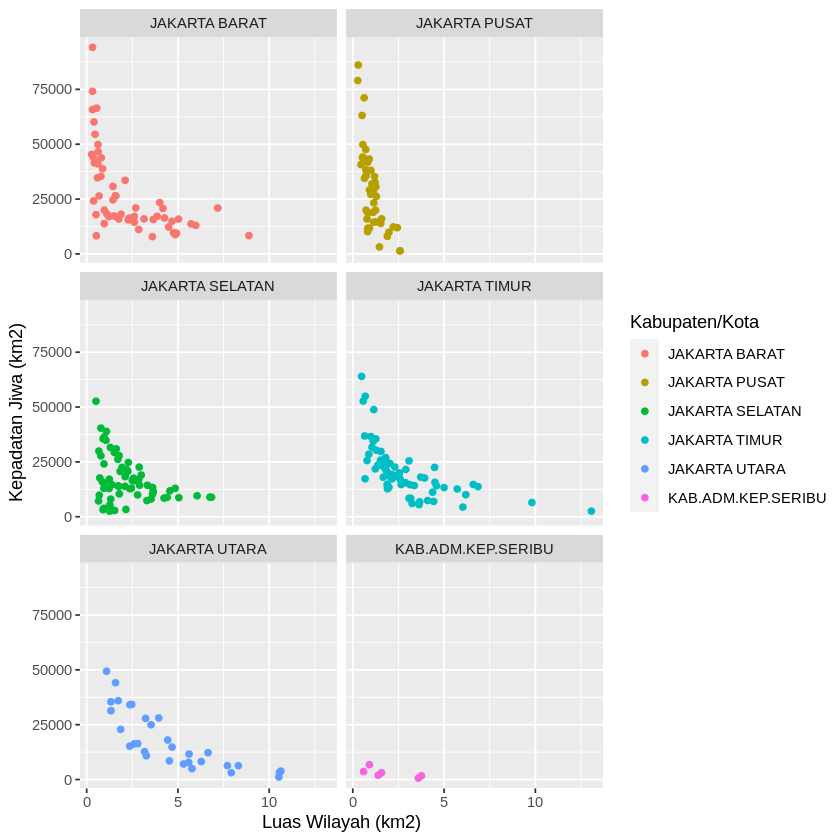

In [ ]:
library(ggplot2)

#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")

#Menambahkan data dan aesthetic mapping
plot.dki <- ggplot(data=penduduk.dki, aes(x = LUAS.WILAYAH..KM2.,  y=KEPADATAN..JIWA.KM2.,  color=NAMA.KABUPATEN.KOTA))

#Menambahkan layer
plot.dki <- plot.dki + layer(geom = "point", stat="identity", position = "identity")
plot.dki <- plot.dki + labs(x="Luas Wilayah (km2)", y="Kepadatan Jiwa (km2)", color="Kabupaten/Kota")
plot.dki + facet_wrap( ~ NAMA.KABUPATEN.KOTA, ncol=2)


# Faceting pada Histogram
Dengan menggunakan function yang sama kita juga bisa memecah histogram menjadi facet grafik.

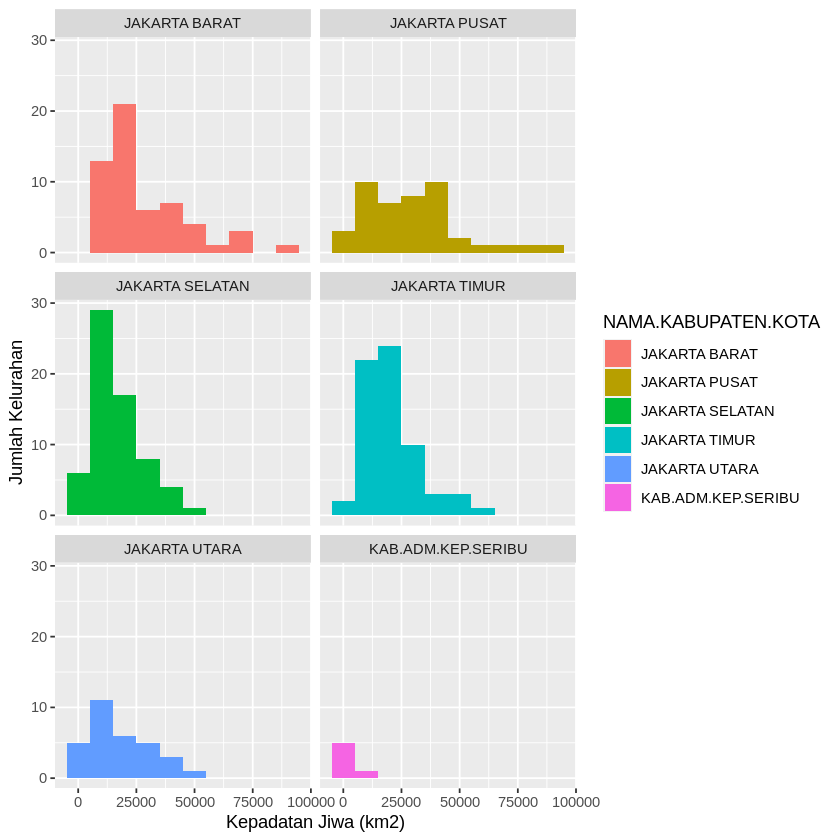

In [ ]:
library(ggplot2)

#Membaca data csv dan dimasukkan ke variable penduduk.dki
penduduk.dki <- read.csv("https://storage.googleapis.com/dqlab-dataset/dkikepadatankelurahan2013.csv", sep=",")

#Menambahkan data dan aesthetic mapping
plot.dki <- ggplot(data=penduduk.dki, aes(x=KEPADATAN..JIWA.KM2.,  fill=NAMA.KABUPATEN.KOTA))

#Menambahkan layer
plot.dki <- plot.dki + geom_histogram(binwidth=10000)
plot.dki <- plot.dki + labs(x="Kepadatan Jiwa (km2)", y="Jumlah Kelurahan", color="Kabupaten/Kota")
plot.dki + facet_wrap( ~ NAMA.KABUPATEN.KOTA, ncol=2)


Sepanjang course ini Anda telah mempelajari fundamental data visualisasi ggplot2 dengan pembelajaran kunci sebagai berikut:

> * Konsep rancangan ggplot2 sebagai grammar of graphics yang memecah satu grafik menjadi komponen-komponen visual.

> * Komponen plot sebagai kanvas dasar sebelum bisa meghasilkan berbagai macam grafik.

> * Data dan aesthetic mapping sebagai isi untuk plot dan grafik.

> * Layer sebagai komponen grafik itu sendiri, yang terdiri dari geom, stat dan position.

> * Pengunaan layer dan transformasi data yang diperlukan untuk menghasilkan scatter plot, histogram, line chart, bar chart, dan pie chart.

> * Faceting untuk memecah grafik sehingga lebih mudah dianalisa.